# Styling & file structure

::::: {.grid}

:::: {.g-col-6}

::: {.callout-note appearance="minimal"}
## Lecture learning goals

1. Create title sections that span the entire width of the app
2. Use collapsable element to hide/show info/components as appropriate
3. Access the state of components
3. Create sidebars that span the entire height and contain a footer
4. Split a single-page app into multiple files to ease maintenance
5. Create a multi-page app
6. Store values in the layout to be used by multiple pages
6. Create a navbar with links to different pages

:::
    
::::

:::: {.g-col-6}

::: {.callout-note appearance="minimal"}
## Optional activities

- [Study the repo for this more complex multi-page app](https://github.com/bradley-erickson/dash-app-structure).

*You can read these either before or after class*               

:::

::::

:::::

**Lecture slides**

No slides this week.

## Additional layouts and styling

A few notes on additional styling
(see comments in coding for details about what different lines do):

- Setting the title of the browser tab via `title=` in the initialization
- `dbc.Collapse` can be used with `dbc.Button` and `dcc.State` to show/hide dashboard elements
    - This is helpful both to show informative text and additional components
- `fluid=True` can be used to remove padding on the sides of the container if desired.
- `style={'height': '100vh'}` can be set to let a sidbar expand to the full height of the window (also see the next example for this)
- We also see how to set a footer in the sidebar by styling it as a flexbox (see comments for details).

<details><summary>Click to show code</summary>

```python
import dash_bootstrap_components as dbc
from dash import Dash, html, dcc, Input, Output, State


# Initialization
app = Dash(
    __name__,
    external_stylesheets=[dbc.themes.BOOTSTRAP],
    title='Splash'
)

# Components
title = html.H1(
    'My splashboard demo',
    style={
        'color': 'white',
        'text-align': 'left',
        'font-size': '48px',
    }
)

sidebar = dbc.Col(
    [
        dbc.Row(
            dbc.Col(
                [
                    dcc.Dropdown(),
                    html.Br(),
                    dcc.Dropdown(),
                    html.Br(),
                    dcc.Dropdown(),
                ],
            ),
        ),
        dbc.Row(
            dbc.Col([
                html.Hr(),
                html.P('Made by Joel', style={'text-align': 'center'}),
            ]),
            style={
                'margin-top': 'auto'  # Align to bottom
            }
        )
    ],
    md=3,
    style={
        'background-color': '#e6e6e6',
        'padding': 15,  # Padding top,left,right,botoom
        'padding-bottom': 0,  # Remove bottom padding for footer
        'height': '90vh',  # vh = "viewport height" = 90% of the window height
        'display': 'flex',  # Allow children to be aligned to bottom
        'flex-direction': 'column',  # Allow for children to be aligned to bottom
    }
) 

collapse_button = dbc.Button(
    "Learn more",
    id="collapse-button",
    outline=False,
    style={
        'width': '150px',
        'background-color': 'white',
        'color': 'steelblue',
        'margin-top': 10,
    }
)

collapse_section = dbc.Collapse(
    html.P("""
        This dashboard is helping you understand x, y, and z, 
        which are really important because a, b, c.
        Start using the dashboard by clicking on 1, 2, 3
        and pulling i, ii, and iii.""",
        style={'color': 'white', 'width': '70%'}),
    id="collapse",
)

# Layout
app.layout = dbc.Container(
    [
        dbc.Row(
            [
                dbc.Col([
                    title,
                    collapse_section
                ]),
                dbc.Col(
                    collapse_button,
                    md=3,
                )
            ],
            style={
                'backgroundColor': 'steelblue',
                'padding-top': '2vh',  # Center vertically, while keeping objects constant when expanding
                'padding-bottom': '2vh',  # Center vertically, while keeping objects constant when expanding
                'min-height': '10vh',  # min-height to allow expansion
            }
        ),
        dbc.Row(
            [
                sidebar,  # Already a dbc.Col
            ],
        ),
    ],
    fluid=True  # Expand to the full width of the window
)

@app.callback(
    Output("collapse", "is_open"),
    Input("collapse-button", "n_clicks"),
    State("collapse", "is_open"),  # Pass the current "state" of the component (is it open or not)
)
def toggle_collapse(n, is_open):
    print(n)  # The number of times the button has been clicked
    print(is_open)  # Whether the collapse is open or not
    return not is_open if n else is_open

if __name__ == '__main__':
    app.run(debug=True)
```

</details>

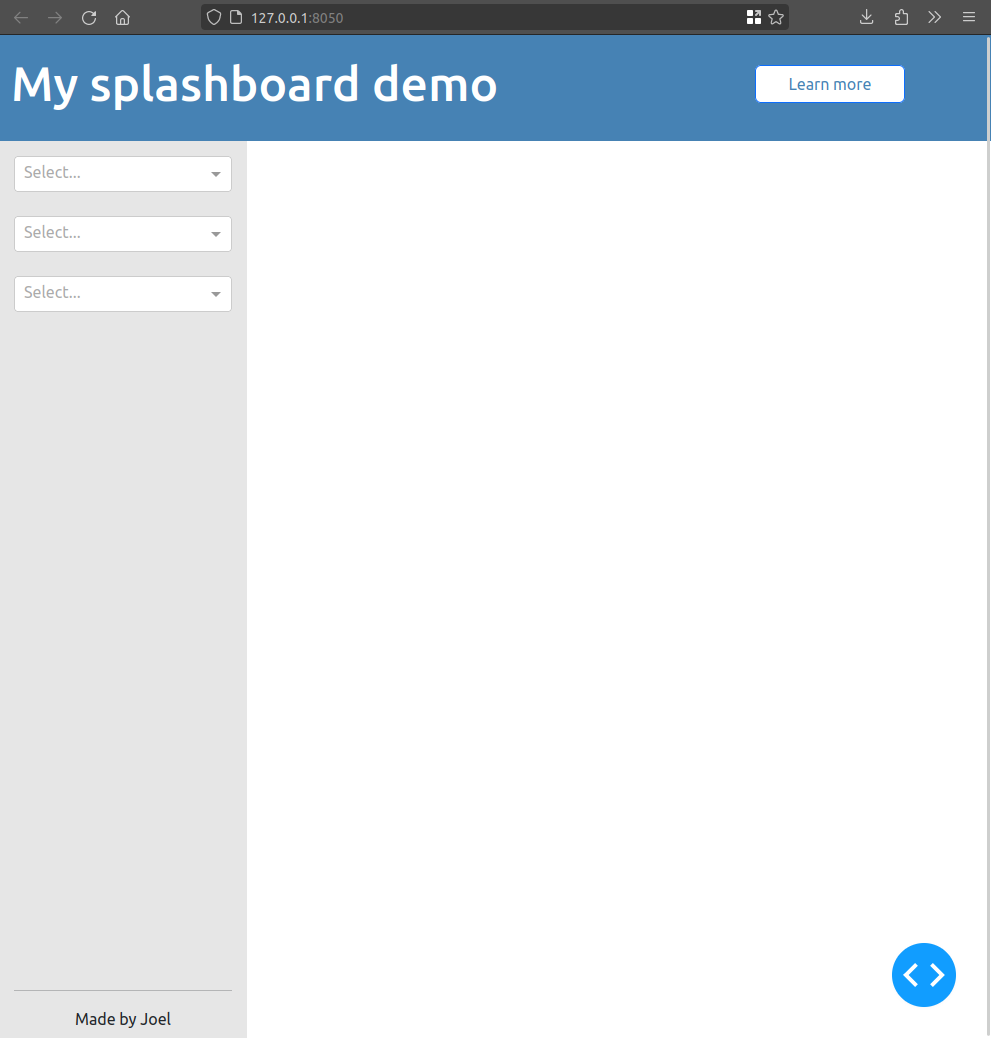

After clicking "Learn more":

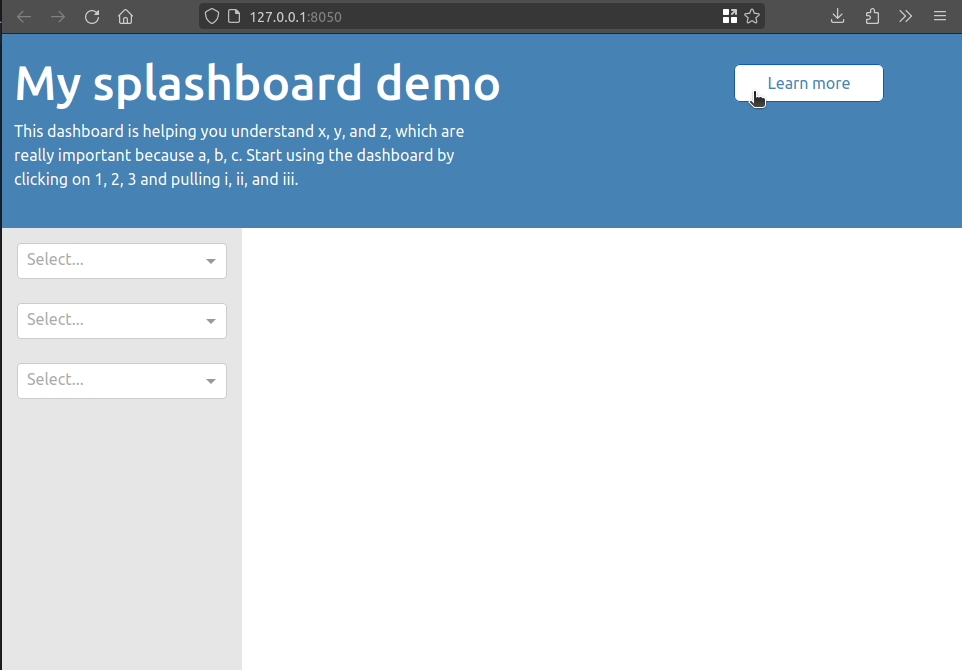

- `dash_daq` give access to some additional components in dash,
  one of the more useful being the boolean switch.
- Here, we use `dbc.Collapse` to hide some advanced components behind a switch.
  This can be useful when there are different levels of expertise in your target audience
  and you want to avoid having an overwhelming landing page.
- We also set a `title` of the app inside the initialization.
  This shows up as the title in the browser tab (instead of it saying just "Dash" by default).

<details><summary>Click to show code</summary>

```python
import dash_bootstrap_components as dbc
from dash import Dash, html, dcc, Input, Output, callback
import dash_daq as daq  # https://github.com/plotly/dash-daq

# Initialization
app = Dash(
    __name__,
    external_stylesheets=[dbc.themes.BOOTSTRAP],
    title='Splash'
)

# Components
title = html.H1(
    'My demo splashboard',
    style={
        'color': 'white',
        'text-align': 'left',
        'font-size': '48px',
    }
)

expert_toggle = daq.BooleanSwitch(
    id='expert-toggle',
    on=False,
    label={'label': 'Expert Mode', 'style': {'color': 'white', 'font-weight': 'bold'}},
    color='#72b7b2'
)

expert_collapse = dbc.Collapse(
    [
        dcc.Slider(0, 20),
        dcc.Slider(0, 20),
        dcc.Slider(0, 20),
        daq.Knob(),
    ],
    id="expert-collapse",
)


sidebar = dbc.Col(
    [
        dbc.Row(
            dbc.Col(
                [
                    title,
                    html.Hr(style={'color': 'white'}),
                    dcc.Dropdown(),
                    html.Br(),
                    dcc.Dropdown(),
                    html.Br(),
                    dcc.Dropdown(),
                    html.Br(),
                    expert_toggle,
                    html.Br(),
                    expert_collapse,
                ],
            ),
        ),
        dbc.Row(
            dbc.Col([
                html.Hr(style={'color': 'white'}),
                html.P('Also made by Joel', style={'text-align': 'center', 'color': 'white'}),
            ]),
            style={
                'margin-top': 'auto'  # Align to bottom
            }
        )
    ],
    md=3,
    style={
        'background-color': 'coral',
        'margin-left': 0,  # Remove the default margin
        'padding': 15,  # Padding top,left,right,botoom
        'padding-bottom': 0,  # Remove bottom padding for footer
        'min-width': '320px',  # A pixel value to ensure text is shown
        'height': '100vh',  # vh = "viewport height" = 100% of the window height
        'display': 'flex',  # Allow children to be aligned to bottom
        'flex-direction': 'column',  # Allow for children to be aligned to bottom
    }
) 

# Layout
app.layout = dbc.Container(
    dbc.Row(
        sidebar,
    ),
    fluid=True  # Expand to the full width of the window
)

@callback(
    Output("expert-collapse", "is_open"),
    Input("expert-toggle", "on"),
)
def toggle_collapse(toggle):
    # Since the switch has a true/false state rather than just a button press,
    # we can just return the value of the toggle
    print(toggle)
    return toggle

if __name__ == '__main__':
    app.run(debug=True)
```

</details>

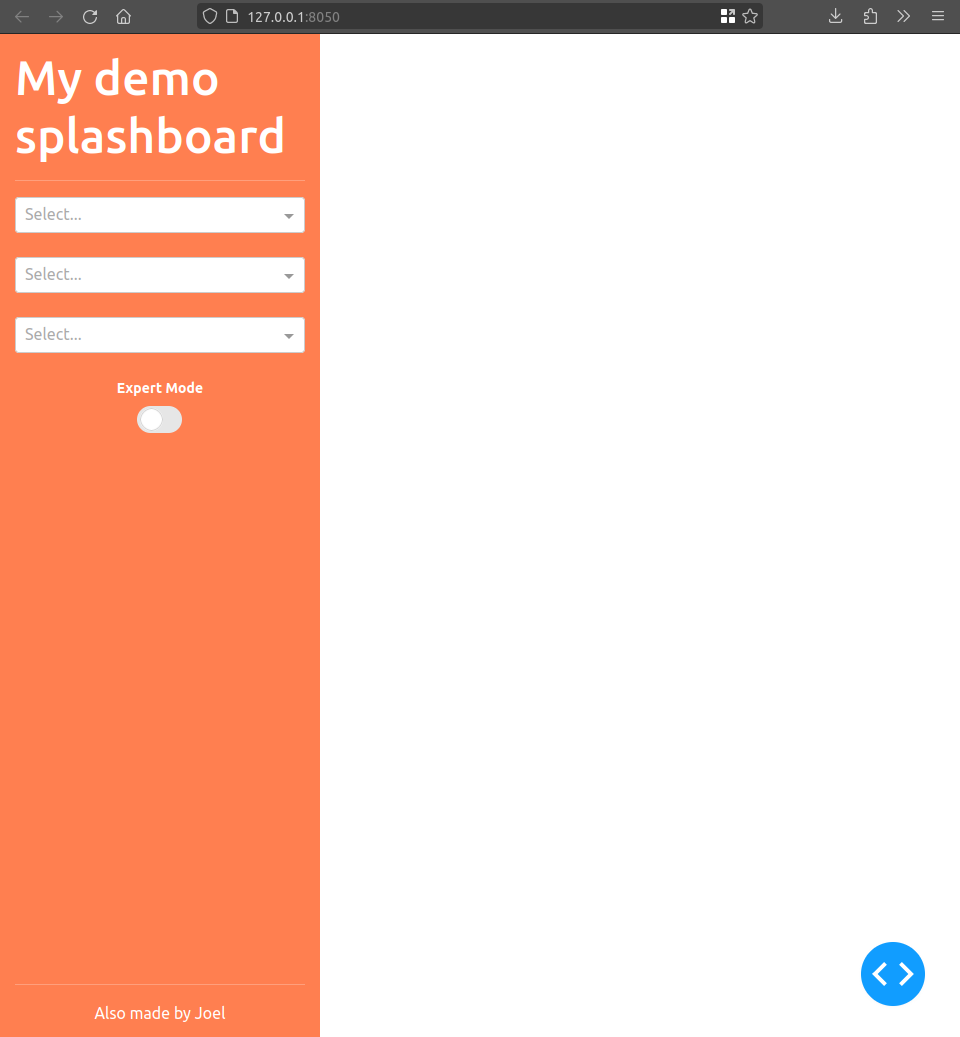

After toggling "Expert Mode" on:

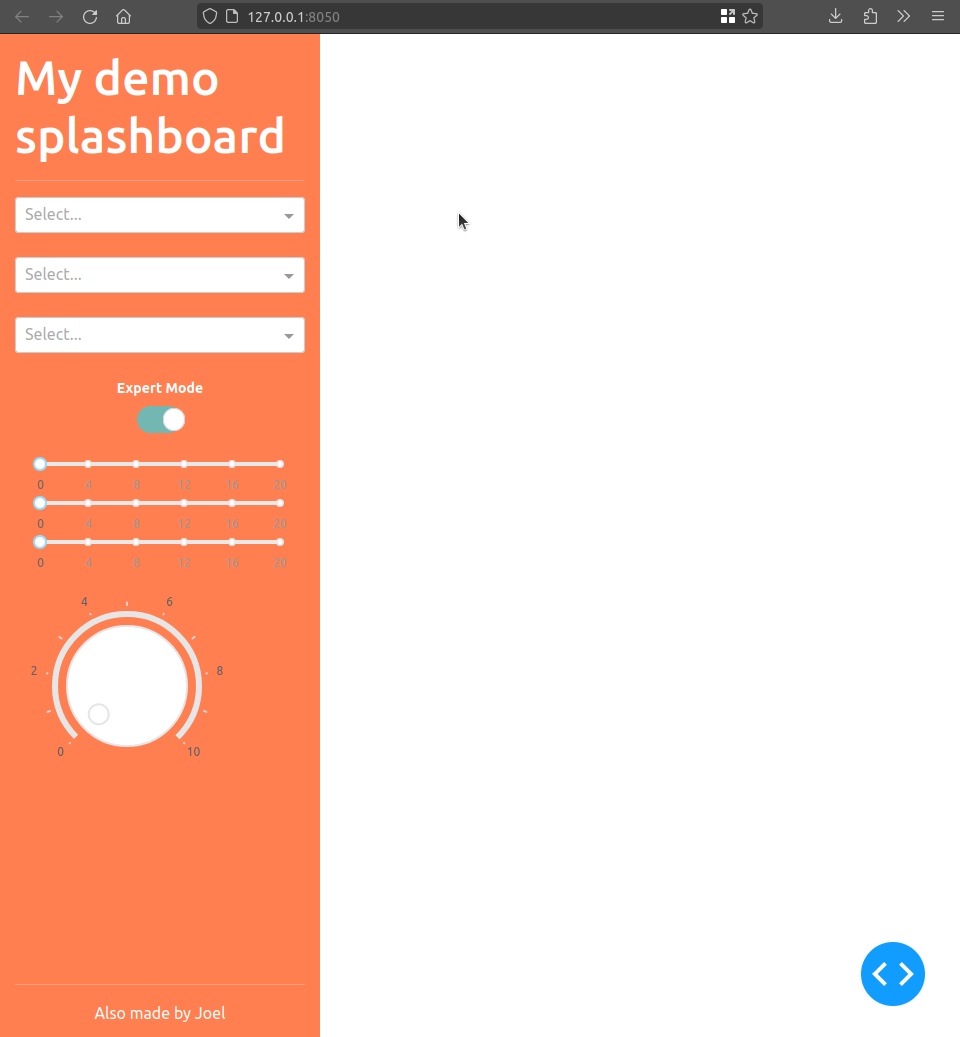

## File structure

So far we have seen how to work in a single `app.py` file,
but this can get unwieldy as the app grown.
Even if our app does not use multiple pages,
it's a good idea to break up the functionality into multiple files.
I have created [a repo with an example with each of the file structures](https://github.com/joelostblom/dash-file-structures/tree/main),
so that they are easier to browse.

### Single-page app with multiple files

Demo in class.
Code will be up after.
The main idea is to divide code into files base on function.
This app looks the same as our single page app,
just split over multiple files.

```sh
src
├── app.py
├── callbacks.py
├── components.py
└── data.py  # Load data so it can be imported by the other files
```

### Complex single-page app with multiple files

In this example we have broken down the structure further,
which can make it easier to work on separate parts of the project
and prevent that some files grow really large.
It also includes how to move CSS from the `style` dictionary
into a separate file stored in the `assets` folder.
Dash will automatically look in this folder for things like 
stylesheets, favicons, images, etc.

```sh
src
├── assets
│   ├── favicon.ico  # The little icon displayed in the browser tab
│   └── style.css  # Components can be styled here instead of via `style={}`
├── callbacks
│   ├── __init__.py  # The init file are only used to simplify the imports (see file for details)
│   ├── charts.py
│   └── table.py
├── components
│   ├── __init__.py
│   ├── general.py  # All short component
│   └── table.py
├── data
│   ├── __init__.py
│   └── data.py
└── app.py
```

### Multi-page app with one file per page

Demo in class.
Code will be up after.
The main idea is to divide code into files base on which page they belong too.
This could be further subdivided into function per page
if the app is partiuclarly large.

```sh
src
├── pages
│   ├── about.py
│   ├── charts.py
│   ├── home.py
│   └── table.py
└── app.py
```

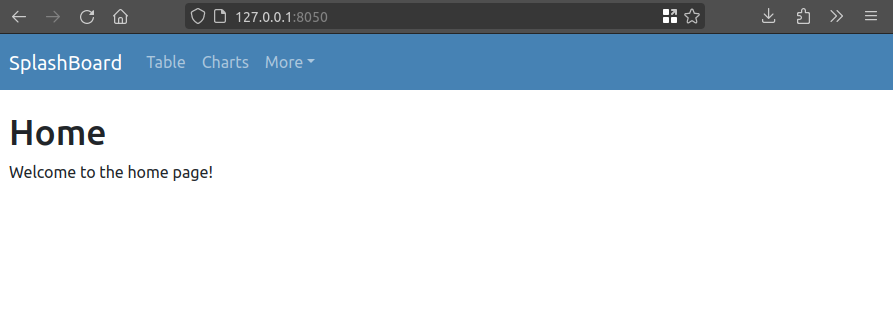

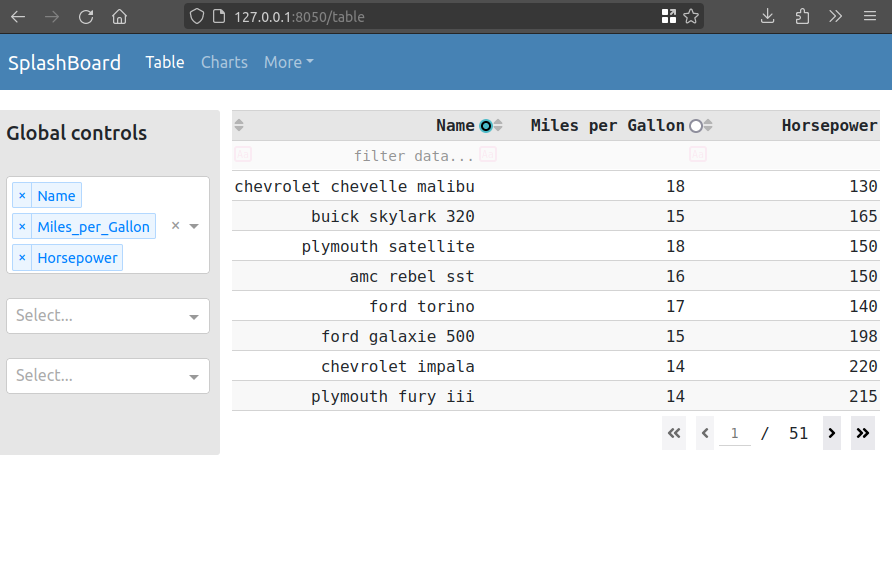

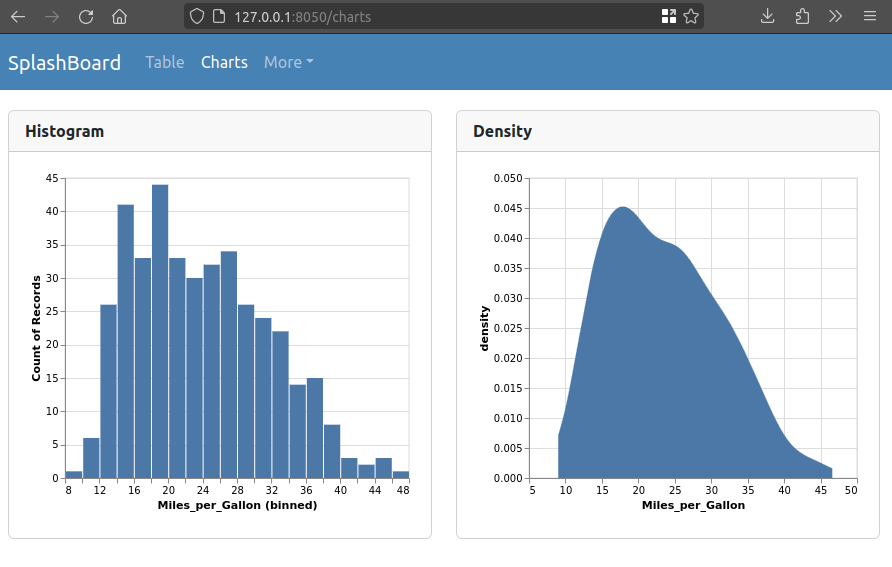

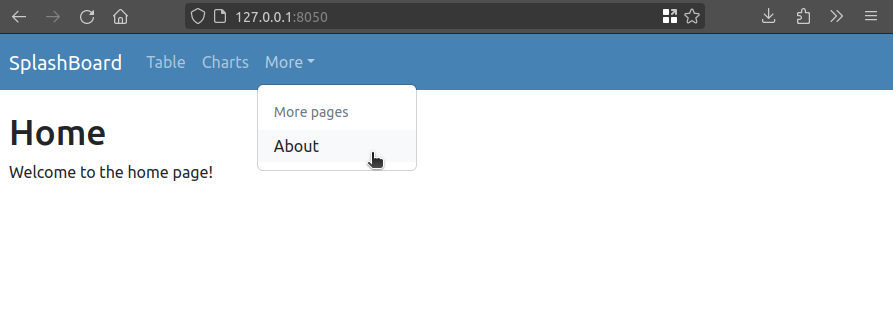

### Multi-page app with multiple files per page

An example of [a more complex multi-page app can be found in this demo repo](https://github.com/bradley-erickson/dash-app-structure).
This combines what we learned about complex single page apps,
with multiple pages
The structure for the example looks like this,
but could be further subdividing into separate callback files as well
if the individual pages grow to large
(but this is less of an issue when the app is already split into multiple pages.

The most relevant part of that app structure is the following:

```sh
src
├── assets
│   ├── logos
│   │   ├── logo_main.png
│   │   └── logo_small.png
│   └── favicon.ico
├── components
│   ├── __init__.py
│   ├── dog_image.py
│   ├── footer.py
│   ├── login.py
│   ├── navbar.py
│   └── number_fact_aio.py
├── pages
│   ├── complex_page
│   │   ├── __init__.py
│   │   ├── comp1.py
│   │   └── layout.py
│   ├── __init__.py
│   ├── home.py
│   ├── login.py
│   ├── logout.py
│   ├── not_found_404.py
│   └── page2.py
├── utils
│   ├── __init__.py
│   ├── api.py
│   ├── images.py
│   └── settings.py
└── app.py
```

There are [even more examples of multi-page apps](https://github.com/AnnMarieW/dash-multi-page-app-demos) in this demo repo.

### Updating the deployment to account for the new file structure

You can either:

- Change the "Root directory" in the setting for your repo on Render to say `src`.
    - You also need to change your data paths to be relative `src` now, so use `../data` to get up to the root of the repo from `src` and then down into the `data` directory.
        - The same for the path to the requirements file on render.com.
    - You also need to change the `gunicorn` command to target `app:server` instead of `src.app:server`

Or: 

- Change the imports to be relative the source file (e.g. `from .components import title, etc`) (note the `.`)
- After doing this we need to run the dash app as a module locally with with `python -m src.app`, instead of as a script with `python src/app` (but you don't need to change anything in the deploy settings on Render).
